# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

# Loading the dataset

In [7]:
airlines_data = pd.read_csv("EastWestAirlines.csv")
airlines_data.describe()
a_data = airlines_data.drop(["ID#"], axis = 1)

# Normalization function

In [8]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [9]:
df_norm = norm_func(a_data)
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
TWSS = []

In [11]:
k = list(range(2, 7))

In [12]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [13]:
TWSS

[823.6756984125224,
 625.1690975109223,
 436.70885761932635,
 348.94332172541465,
 319.00949573417944]

# Scree Plot or Elbow curve

Text(0, 0.5, 'total_within_SS')

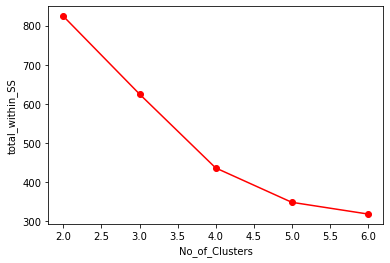

In [14]:
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

# Threfore, optimal number of clusters = 4

In [15]:
model = KMeans(n_clusters = 4)

In [16]:
model.fit(df_norm)

KMeans(n_clusters=4)

# getting the labels of clusters assigned to each row

In [17]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

# converting numpy array into pandas series object

In [18]:
mb = pd.Series(model.labels_)

# creating a  new column and assigning it to new column

In [19]:
a_data['clust'] = mb

In [20]:
a_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [21]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [22]:
a_data = a_data.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]

In [23]:
a_data.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,0,19244,0,1,1,1,215,2,0,0,6968,0
2,0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,14776,0,1,1,1,500,1,0,0,6952,0
4,1,97752,0,4,1,1,43300,26,2077,4,6935,1
